<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [9]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [10]:
#Using pyton indexing: 

In [11]:
satcsv = "/Users/alexjacob/Desktop/sat_scores.csv"


In [12]:
with open(satcsv, 'r') as f:
    rows = [row for row in csv.reader(f)]
    header = rows[0]
    data = rows[1:]

In [13]:
sat = {header[i]:[float(row[i]) if row[i].isdigit() else row[i] for row in data] for i in range(len(header))}

In [14]:
df = pd.DataFrame(sat)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   52 non-null     object 
 1   Rate    52 non-null     float64
 2   Verbal  52 non-null     float64
 3   Math    52 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.8+ KB


In [16]:
print(df)

   State  Rate  Verbal   Math
0     CT  82.0   509.0  510.0
1     NJ  81.0   499.0  513.0
2     MA  79.0   511.0  515.0
3     NY  77.0   495.0  505.0
4     NH  72.0   520.0  516.0
5     RI  71.0   501.0  499.0
6     PA  71.0   500.0  499.0
7     VT  69.0   511.0  506.0
8     ME  69.0   506.0  500.0
9     VA  68.0   510.0  501.0
10    DE  67.0   501.0  499.0
11    MD  65.0   508.0  510.0
12    NC  65.0   493.0  499.0
13    GA  63.0   491.0  489.0
14    IN  60.0   499.0  501.0
15    SC  57.0   486.0  488.0
16    DC  56.0   482.0  474.0
17    OR  55.0   526.0  526.0
18    FL  54.0   498.0  499.0
19    WA  53.0   527.0  527.0
20    TX  53.0   493.0  499.0
21    HI  52.0   485.0  515.0
22    AK  51.0   514.0  510.0
23    CA  51.0   498.0  517.0
24    AZ  34.0   523.0  525.0
25    NV  33.0   509.0  515.0
26    CO  31.0   539.0  542.0
27    OH  26.0   534.0  439.0
28    MT  23.0   539.0  539.0
29    WV  18.0   527.0  512.0
30    ID  17.0   543.0  542.0
31    TN  13.0   562.0  553.0
32    NM  

In [17]:
print(df.tail(1))

   State  Rate  Verbal   Math
51   All  45.0   506.0  514.0


In [18]:
print (df )

   State  Rate  Verbal   Math
0     CT  82.0   509.0  510.0
1     NJ  81.0   499.0  513.0
2     MA  79.0   511.0  515.0
3     NY  77.0   495.0  505.0
4     NH  72.0   520.0  516.0
5     RI  71.0   501.0  499.0
6     PA  71.0   500.0  499.0
7     VT  69.0   511.0  506.0
8     ME  69.0   506.0  500.0
9     VA  68.0   510.0  501.0
10    DE  67.0   501.0  499.0
11    MD  65.0   508.0  510.0
12    NC  65.0   493.0  499.0
13    GA  63.0   491.0  489.0
14    IN  60.0   499.0  501.0
15    SC  57.0   486.0  488.0
16    DC  56.0   482.0  474.0
17    OR  55.0   526.0  526.0
18    FL  54.0   498.0  499.0
19    WA  53.0   527.0  527.0
20    TX  53.0   493.0  499.0
21    HI  52.0   485.0  515.0
22    AK  51.0   514.0  510.0
23    CA  51.0   498.0  517.0
24    AZ  34.0   523.0  525.0
25    NV  33.0   509.0  515.0
26    CO  31.0   539.0  542.0
27    OH  26.0   534.0  439.0
28    MT  23.0   539.0  539.0
29    WV  18.0   527.0  512.0
30    ID  17.0   543.0  542.0
31    TN  13.0   562.0  553.0
32    NM  

In [19]:
df = df[:-1]

In [20]:
print(df)

   State  Rate  Verbal   Math
0     CT  82.0   509.0  510.0
1     NJ  81.0   499.0  513.0
2     MA  79.0   511.0  515.0
3     NY  77.0   495.0  505.0
4     NH  72.0   520.0  516.0
5     RI  71.0   501.0  499.0
6     PA  71.0   500.0  499.0
7     VT  69.0   511.0  506.0
8     ME  69.0   506.0  500.0
9     VA  68.0   510.0  501.0
10    DE  67.0   501.0  499.0
11    MD  65.0   508.0  510.0
12    NC  65.0   493.0  499.0
13    GA  63.0   491.0  489.0
14    IN  60.0   499.0  501.0
15    SC  57.0   486.0  488.0
16    DC  56.0   482.0  474.0
17    OR  55.0   526.0  526.0
18    FL  54.0   498.0  499.0
19    WA  53.0   527.0  527.0
20    TX  53.0   493.0  499.0
21    HI  52.0   485.0  515.0
22    AK  51.0   514.0  510.0
23    CA  51.0   498.0  517.0
24    AZ  34.0   523.0  525.0
25    NV  33.0   509.0  515.0
26    CO  31.0   539.0  542.0
27    OH  26.0   534.0  439.0
28    MT  23.0   539.0  539.0
29    WV  18.0   527.0  512.0
30    ID  17.0   543.0  542.0
31    TN  13.0   562.0  553.0
32    NM  

In [21]:
header = rows[0]
print(header)



['State', 'Rate', 'Verbal', 'Math']


In [22]:
print(rows[1:52])

[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12', '550', '550'], ['WY', '11', '547',

In [23]:
data = rows[1:52]


In [24]:
print(data)

[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12', '550', '550'], ['WY', '11', '547',

In [25]:
len(data)

51

In [26]:
df.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [27]:
satscores = pd.read_csv("/Users/alexjacob/Desktop/sat_scores.csv")

In [28]:
satscores.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [29]:
satscores.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [30]:
#to get rid of tail 
satscores = satscores.iloc[:-1, :]

In [31]:
satscores


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [32]:
#pandas done ! 

In [33]:
print(rows)

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

In [34]:
print(rows[0])

['State', 'Rate', 'Verbal', 'Math']


In [35]:
rows = rows[1:]

In [36]:
print(rows)

[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12', '550', '550'], ['WY', '11', '547',

In [37]:
#with open python done

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [38]:
df.head(10)

,State,Rate,Verbal,Math
0,CT,82.0,509.0,510.0
1,NJ,81.0,499.0,513.0
2,MA,79.0,511.0,515.0
3,NY,77.0,495.0,505.0
4,NH,72.0,520.0,516.0
5,RI,71.0,501.0,499.0
6,PA,71.0,500.0,499.0
7,VT,69.0,511.0,506.0
8,ME,69.0,506.0,500.0
9,VA,68.0,510.0,501.0


In [39]:
#our data describes the average verbal,math & rate of completion of SAT scores for varioius US states 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [40]:
print(df)

   State  Rate  Verbal   Math
0     CT  82.0   509.0  510.0
1     NJ  81.0   499.0  513.0
2     MA  79.0   511.0  515.0
3     NY  77.0   495.0  505.0
4     NH  72.0   520.0  516.0
5     RI  71.0   501.0  499.0
6     PA  71.0   500.0  499.0
7     VT  69.0   511.0  506.0
8     ME  69.0   506.0  500.0
9     VA  68.0   510.0  501.0
10    DE  67.0   501.0  499.0
11    MD  65.0   508.0  510.0
12    NC  65.0   493.0  499.0
13    GA  63.0   491.0  489.0
14    IN  60.0   499.0  501.0
15    SC  57.0   486.0  488.0
16    DC  56.0   482.0  474.0
17    OR  55.0   526.0  526.0
18    FL  54.0   498.0  499.0
19    WA  53.0   527.0  527.0
20    TX  53.0   493.0  499.0
21    HI  52.0   485.0  515.0
22    AK  51.0   514.0  510.0
23    CA  51.0   498.0  517.0
24    AZ  34.0   523.0  525.0
25    NV  33.0   509.0  515.0
26    CO  31.0   539.0  542.0
27    OH  26.0   534.0  439.0
28    MT  23.0   539.0  539.0
29    WV  18.0   527.0  512.0
30    ID  17.0   543.0  542.0
31    TN  13.0   562.0  553.0
32    NM  

In [41]:
datadict= {
    "State":{
        "type":df.State.dtype,
        "description": "State"
    },
    "Rate":{
        "type":df.Rate.dtype,
        "description":"Average maath scores"
    },
    "Math":{
        "type":df.Math.dtype,
        "description":"Average math scores"
    },
    "Verbal":{
        "type":df.Verbal.dtype,
        "description":"Average verbal score"
    },
    "dataset_shape":df.shape
}

print(datadict)
#change from sat to satcsv once done first bit 

{'State': {'type': dtype('O'), 'description': 'State'}, 'Rate': {'type': dtype('float64'), 'description': 'Average maath scores'}, 'Math': {'type': dtype('float64'), 'description': 'Average math scores'}, 'Verbal': {'type': dtype('float64'), 'description': 'Average verbal score'}, 'dataset_shape': (51, 4)}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [42]:
print(df.dtypes)

State      object
Rate      float64
Verbal    float64
Math      float64
dtype: object


In [43]:
df

,State,Rate,Verbal,Math
0,CT,82.0,509.0,510.0
1,NJ,81.0,499.0,513.0
2,MA,79.0,511.0,515.0
3,NY,77.0,495.0,505.0
4,NH,72.0,520.0,516.0
5,RI,71.0,501.0,499.0
6,PA,71.0,500.0,499.0
7,VT,69.0,511.0,506.0
8,ME,69.0,506.0,500.0
9,VA,68.0,510.0,501.0


In [44]:
print(df.describe()) 

            Rate      Verbal        Math
count  51.000000   51.000000   51.000000
mean   37.000000  532.529412  531.843137
std    27.550681   33.360667   36.287393
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  503.000000
50%    33.000000  527.000000  525.000000
75%    64.000000  562.000000  557.500000
max    82.000000  593.000000  603.000000


In [45]:
df.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [46]:
print(datadict)

{'State': {'type': dtype('O'), 'description': 'State'}, 'Rate': {'type': dtype('float64'), 'description': 'Average maath scores'}, 'Math': {'type': dtype('float64'), 'description': 'Average math scores'}, 'Verbal': {'type': dtype('float64'), 'description': 'Average verbal score'}, 'dataset_shape': (51, 4)}


/Users/alexjacob/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'seaborn' has no attribute 'set_axis_labels'

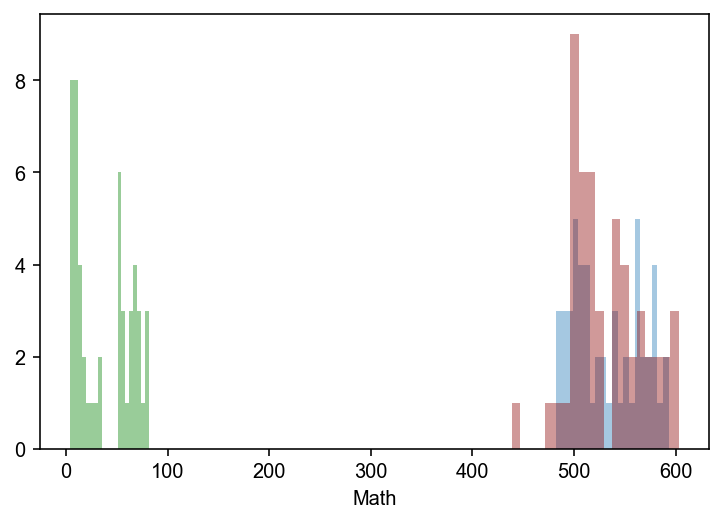

In [47]:
sns.distplot(df["Rate"], bins = 20, color ="green", kde= False)
sns.distplot(df["Verbal"], bins = 20, kde = False)
sns.distplot(df["Math"], bins = 20, color = 'darkred', kde = False)
sns.set_style("dark")
sns.set_axis_labels("x","y")

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

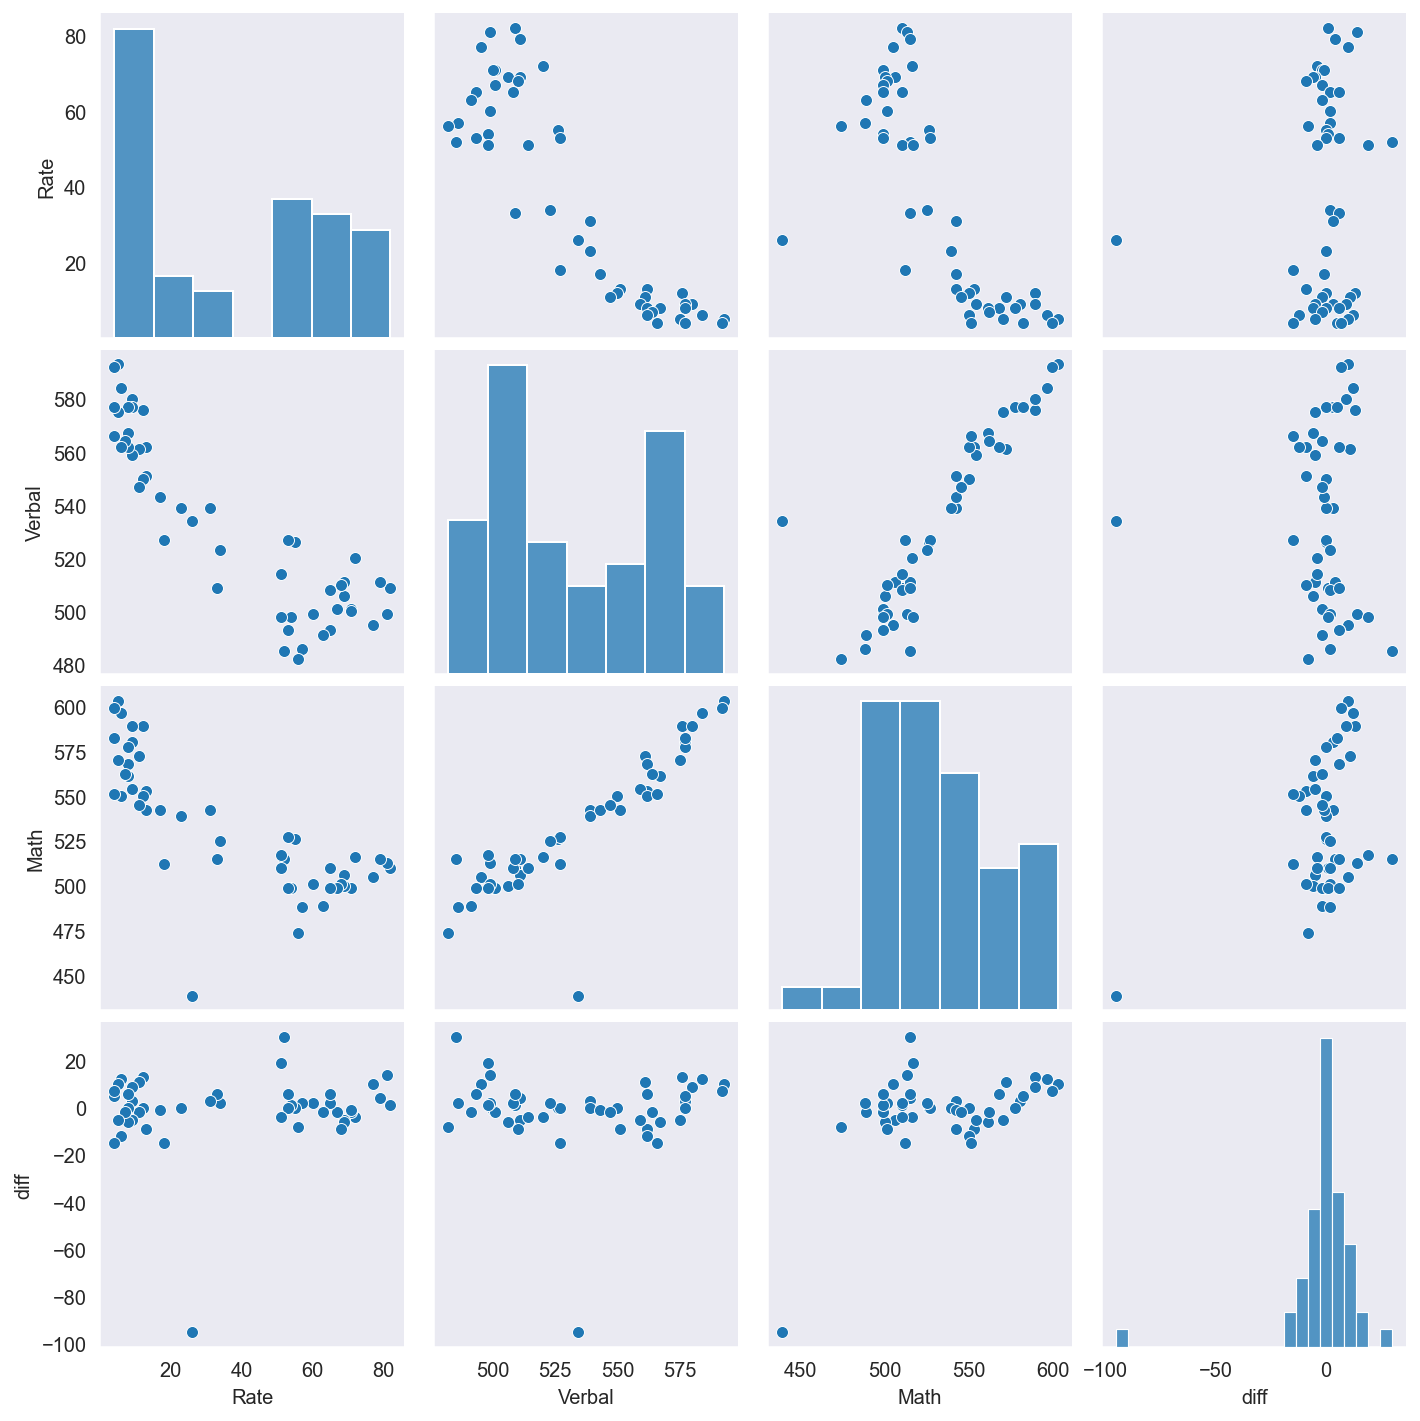

In [197]:
sns.set_style("dark")
sns.color_palette("pastel")
sns.pairplot(df)


In [49]:
##The visualisaton shows us that math and verbal both ahve a strong positive linear correlation, whilst rate has a negative linear correlation

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

(array([1., 2., 0., 0., 3., 1., 0., 4., 3., 0., 1., 1., 3., 2., 1., 0., 0.,
        1., 1., 1., 2., 0., 0., 1., 0., 2., 0., 1., 0., 1., 1., 1., 0., 0.,
        1., 1., 4., 1., 1., 0., 0., 1., 4., 0., 1., 1., 0., 0., 0., 2.]),
 array([482.  , 484.22, 486.44, 488.66, 490.88, 493.1 , 495.32, 497.54,
        499.76, 501.98, 504.2 , 506.42, 508.64, 510.86, 513.08, 515.3 ,
        517.52, 519.74, 521.96, 524.18, 526.4 , 528.62, 530.84, 533.06,
        535.28, 537.5 , 539.72, 541.94, 544.16, 546.38, 548.6 , 550.82,
        553.04, 555.26, 557.48, 559.7 , 561.92, 564.14, 566.36, 568.58,
        570.8 , 573.02, 575.24, 577.46, 579.68, 581.9 , 584.12, 586.34,
        588.56, 590.78, 593.  ]),
 <BarContainer object of 50 artists>)

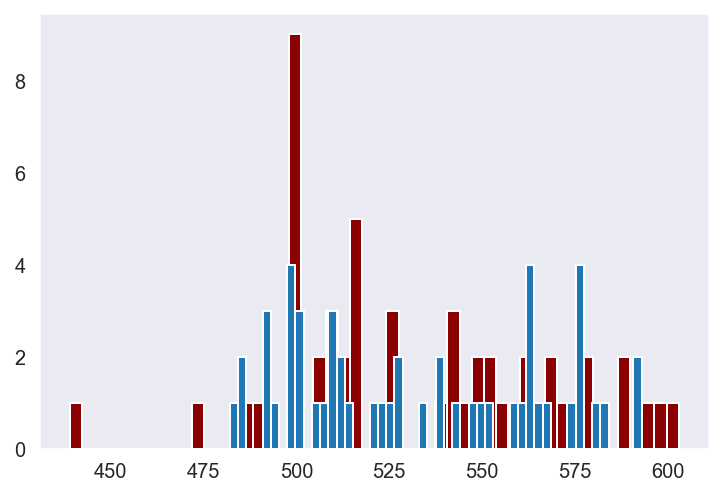

In [50]:
plt.hist(df.Math, bins = 50, color = 'darkred')
plt.hist(df.Verbal, bins = 50)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [51]:
#boxplots are useful as they quickly and visually demonstrate the range of the variables, simply put showing how the variables are spread put 

<AxesSubplot:title={'center':'Math'}, xlabel='Verbal'>

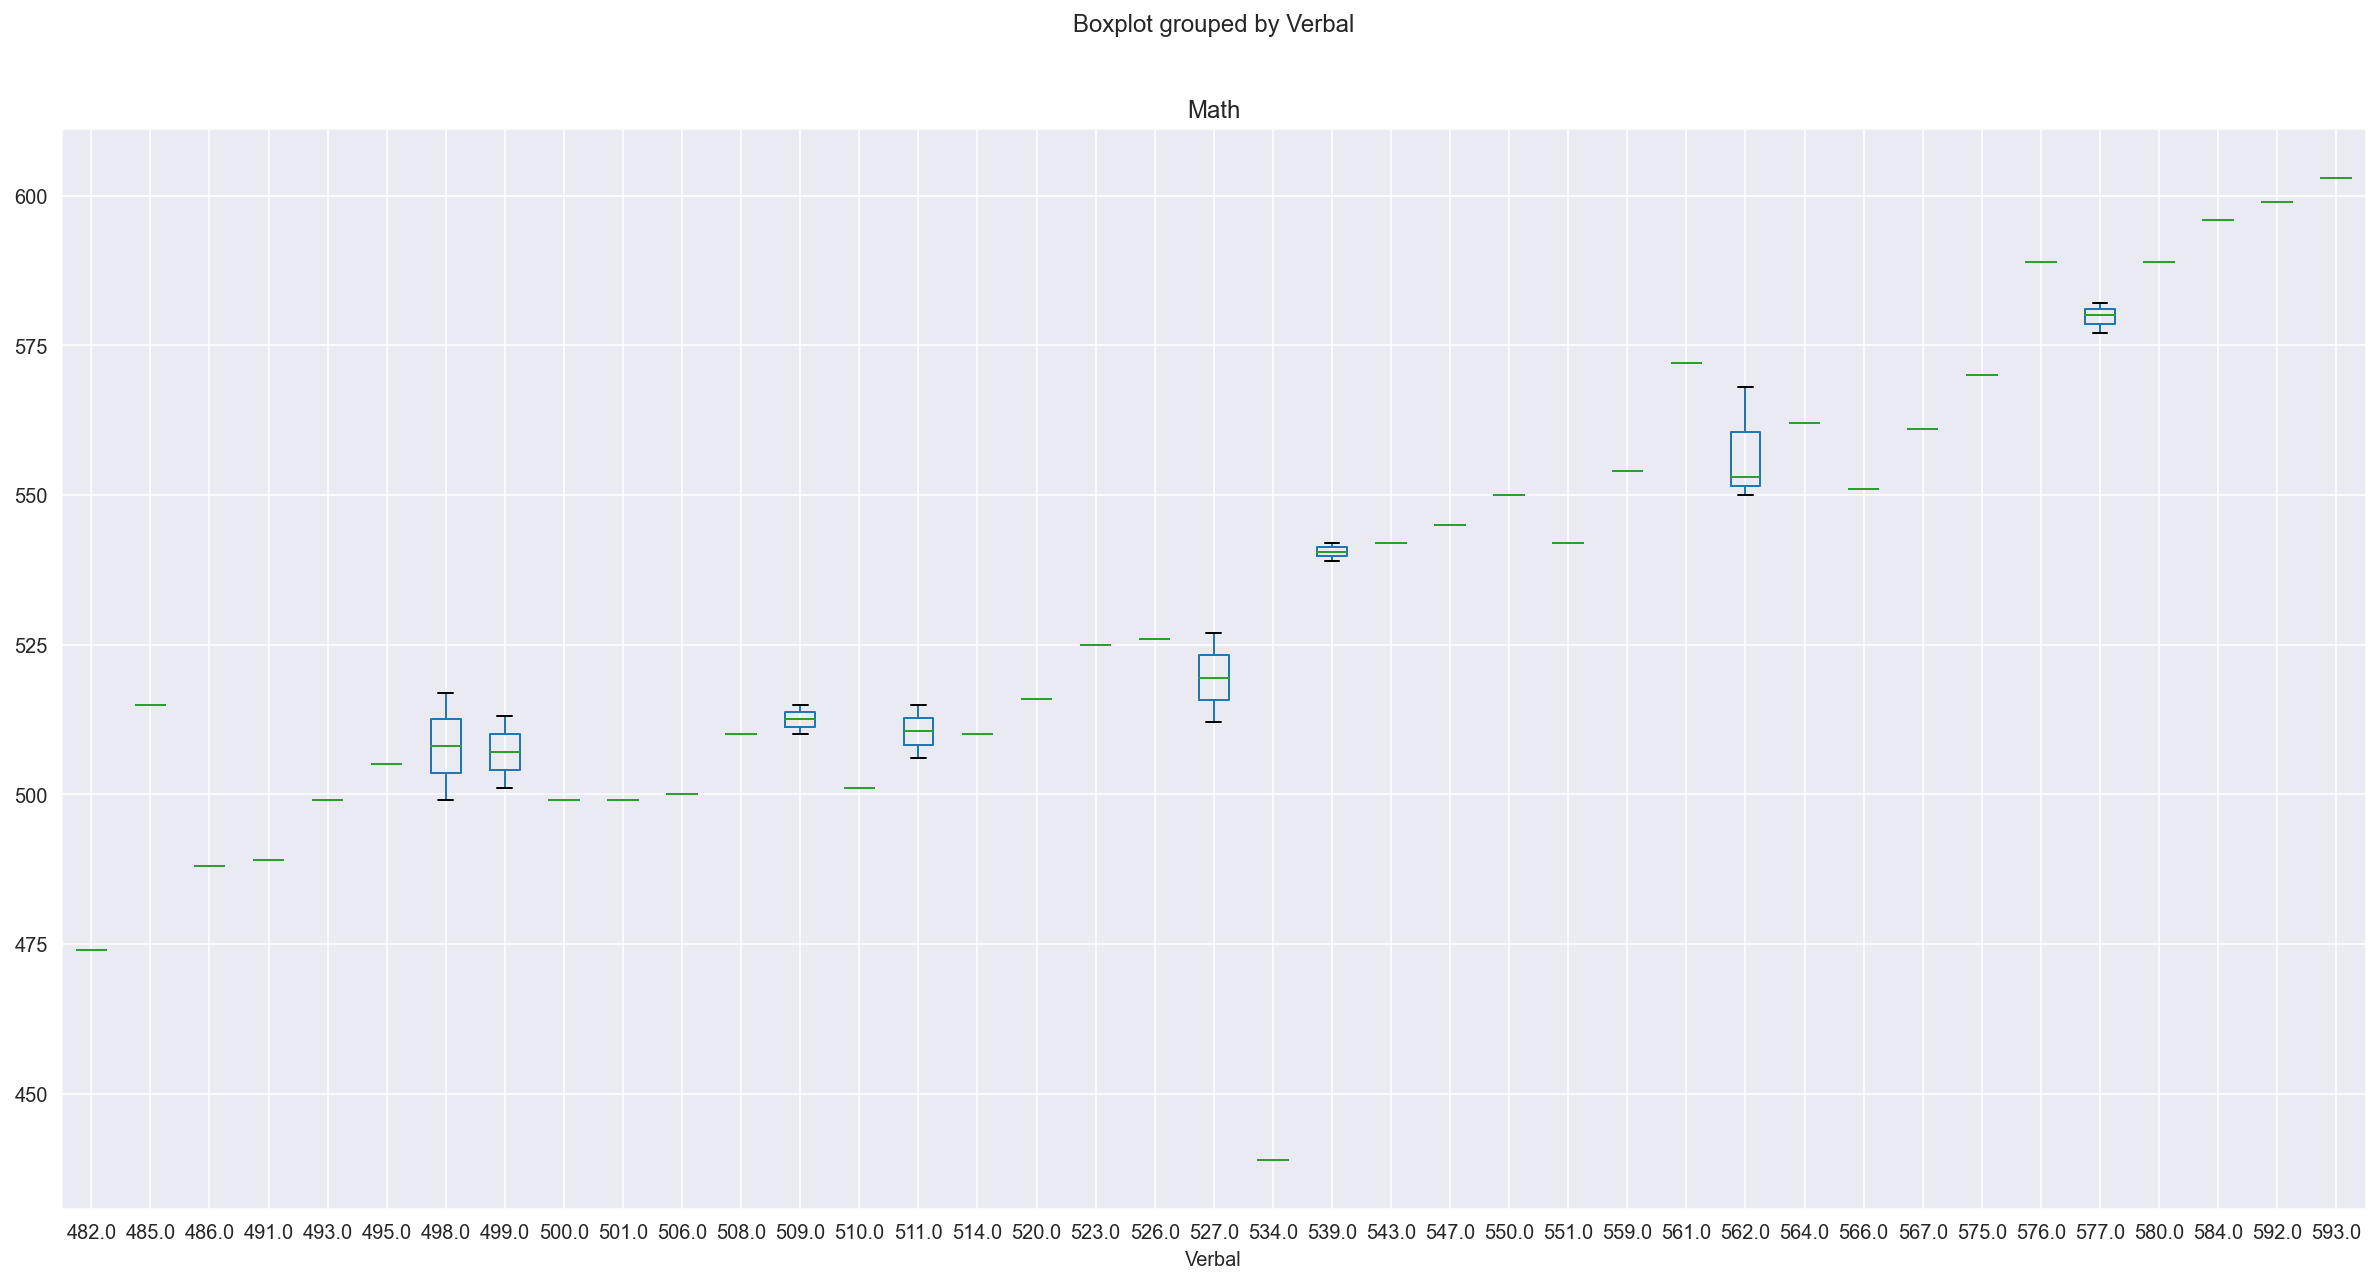

In [265]:
df.boxplot("Math", "Verbal", figsize =(20,10))

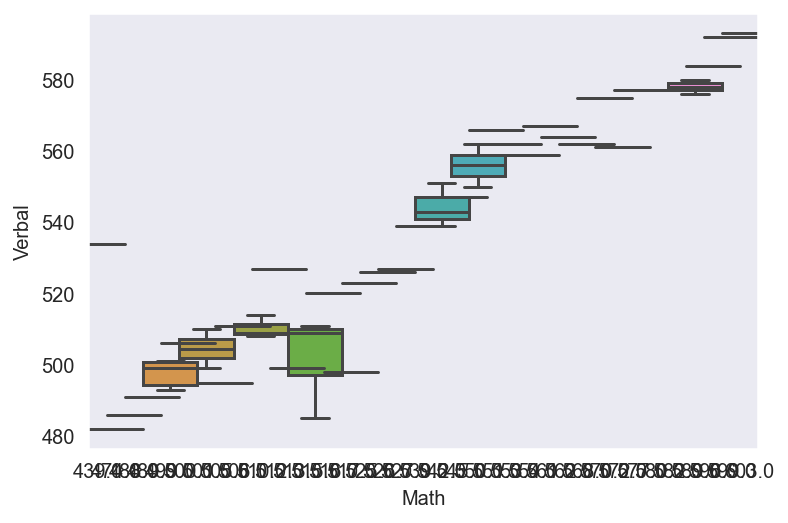

In [271]:
ax = sns.boxplot(x = df["Math"], y = df["Verbal"], width =3)
#write this down
#go over this 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [ ]:
#DO THIS

<AxesSubplot:>

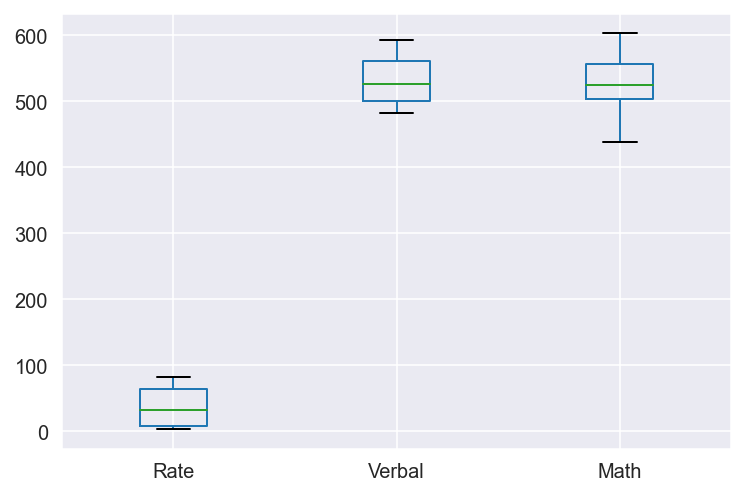

In [54]:
df.boxplot()
##add to this 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [55]:
#first we must find the average of the scores across states 
df["Verbal"].mean
#therefore mean = 509.0

<bound method Series.mean of 0     509.0
1     499.0
2     511.0
3     495.0
4     520.0
5     501.0
6     500.0
7     511.0
8     506.0
9     510.0
10    501.0
11    508.0
12    493.0
13    491.0
14    499.0
15    486.0
16    482.0
17    526.0
18    498.0
19    527.0
20    493.0
21    485.0
22    514.0
23    498.0
24    523.0
25    509.0
26    539.0
27    534.0
28    539.0
29    527.0
30    543.0
31    562.0
32    551.0
33    576.0
34    550.0
35    547.0
36    561.0
37    580.0
38    577.0
39    559.0
40    562.0
41    567.0
42    577.0
43    564.0
44    584.0
45    562.0
46    575.0
47    593.0
48    577.0
49    592.0
50    566.0
Name: Verbal, dtype: float64>

In [56]:
#mask = (gold.year <= 2016) & (gold.year >= 2014)
mask1 =(df.Verbal > 509, df.State) 


In [273]:
print(mask1)

(0     False
1     False
2      True
3     False
4      True
5     False
6     False
7      True
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19     True
20    False
21    False
22     True
23    False
24     True
25    False
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
Name: Verbal, dtype: bool, 0     CT
1     NJ
2     MA
3     NY
4     NH
5     RI
6     PA
7     VT
8     ME
9     VA
10    DE
11    MD
12    NC
13    GA
14    IN
15    SC
16    DC
17    OR
18    FL
19    WA
20    TX
21    HI
22    AK
23    CA
24    AZ
25    NV
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL


In [58]:
df.State

0     CT
1     NJ
2     MA
3     NY
4     NH
5     RI
6     PA
7     VT
8     ME
9     VA
10    DE
11    MD
12    NC
13    GA
14    IN
15    SC
16    DC
17    OR
18    FL
19    WA
20    TX
21    HI
22    AK
23    CA
24    AZ
25    NV
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [59]:
print(mask1, df.State)

(0     False
1     False
2      True
3     False
4      True
5     False
6     False
7      True
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19     True
20    False
21    False
22     True
23    False
24     True
25    False
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
Name: Verbal, dtype: bool, 0     CT
1     NJ
2     MA
3     NY
4     NH
5     RI
6     PA
7     VT
8     ME
9     VA
10    DE
11    MD
12    NC
13    GA
14    IN
15    SC
16    DC
17    OR
18    FL
19    WA
20    TX
21    HI
22    AK
23    CA
24    AZ
25    NV
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [60]:
#find median
df.Verbal.median
#median = 509 

<bound method Series.median of 0     509.0
1     499.0
2     511.0
3     495.0
4     520.0
5     501.0
6     500.0
7     511.0
8     506.0
9     510.0
10    501.0
11    508.0
12    493.0
13    491.0
14    499.0
15    486.0
16    482.0
17    526.0
18    498.0
19    527.0
20    493.0
21    485.0
22    514.0
23    498.0
24    523.0
25    509.0
26    539.0
27    534.0
28    539.0
29    527.0
30    543.0
31    562.0
32    551.0
33    576.0
34    550.0
35    547.0
36    561.0
37    580.0
38    577.0
39    559.0
40    562.0
41    567.0
42    577.0
43    564.0
44    584.0
45    562.0
46    575.0
47    593.0
48    577.0
49    592.0
50    566.0
Name: Verbal, dtype: float64>

In [61]:
#Due to mean and median being equal to 509, this implies the verbal column to be normally distributed 

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [62]:
df['diff'] = df['Math'] - df['Verbal']

In [63]:
print(df.diff)

<bound method DataFrame.diff of    State  Rate  Verbal   Math  diff
0     CT  82.0   509.0  510.0   1.0
1     NJ  81.0   499.0  513.0  14.0
2     MA  79.0   511.0  515.0   4.0
3     NY  77.0   495.0  505.0  10.0
4     NH  72.0   520.0  516.0  -4.0
5     RI  71.0   501.0  499.0  -2.0
6     PA  71.0   500.0  499.0  -1.0
7     VT  69.0   511.0  506.0  -5.0
8     ME  69.0   506.0  500.0  -6.0
9     VA  68.0   510.0  501.0  -9.0
10    DE  67.0   501.0  499.0  -2.0
11    MD  65.0   508.0  510.0   2.0
12    NC  65.0   493.0  499.0   6.0
13    GA  63.0   491.0  489.0  -2.0
14    IN  60.0   499.0  501.0   2.0
15    SC  57.0   486.0  488.0   2.0
16    DC  56.0   482.0  474.0  -8.0
17    OR  55.0   526.0  526.0   0.0
18    FL  54.0   498.0  499.0   1.0
19    WA  53.0   527.0  527.0   0.0
20    TX  53.0   493.0  499.0   6.0
21    HI  52.0   485.0  515.0  30.0
22    AK  51.0   514.0  510.0  -4.0
23    CA  51.0   498.0  517.0  19.0
24    AZ  34.0   523.0  525.0   2.0
25    NV  33.0   509.0  515.0   

In [64]:
print(df)

   State  Rate  Verbal   Math  diff
0     CT  82.0   509.0  510.0   1.0
1     NJ  81.0   499.0  513.0  14.0
2     MA  79.0   511.0  515.0   4.0
3     NY  77.0   495.0  505.0  10.0
4     NH  72.0   520.0  516.0  -4.0
5     RI  71.0   501.0  499.0  -2.0
6     PA  71.0   500.0  499.0  -1.0
7     VT  69.0   511.0  506.0  -5.0
8     ME  69.0   506.0  500.0  -6.0
9     VA  68.0   510.0  501.0  -9.0
10    DE  67.0   501.0  499.0  -2.0
11    MD  65.0   508.0  510.0   2.0
12    NC  65.0   493.0  499.0   6.0
13    GA  63.0   491.0  489.0  -2.0
14    IN  60.0   499.0  501.0   2.0
15    SC  57.0   486.0  488.0   2.0
16    DC  56.0   482.0  474.0  -8.0
17    OR  55.0   526.0  526.0   0.0
18    FL  54.0   498.0  499.0   1.0
19    WA  53.0   527.0  527.0   0.0
20    TX  53.0   493.0  499.0   6.0
21    HI  52.0   485.0  515.0  30.0
22    AK  51.0   514.0  510.0  -4.0
23    CA  51.0   498.0  517.0  19.0
24    AZ  34.0   523.0  525.0   2.0
25    NV  33.0   509.0  515.0   6.0
26    CO  31.0   539.0  542.

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [65]:
#1 - ascending = True 
ddifsort = df.sort_values(["diff", "Math", "Verbal"], ascending= True)

In [66]:
literate_states = ddifsort[0:10]

In [67]:
literate_states

,State,Rate,Verbal,Math,diff
27,OH,26.0,534.0,439.0,-95.0
29,WV,18.0,527.0,512.0,-15.0
50,MS,4.0,566.0,551.0,-15.0
45,AR,6.0,562.0,550.0,-12.0
9,VA,68.0,510.0,501.0,-9.0
32,NM,13.0,551.0,542.0,-9.0
31,TN,13.0,562.0,553.0,-9.0
16,DC,56.0,482.0,474.0,-8.0
8,ME,69.0,506.0,500.0,-6.0
41,OK,8.0,567.0,561.0,-6.0


In [68]:
ddifsort2 = df.sort_values(["diff", "Math", "Verbal"], ascending= False)

In [69]:
numeric_states = ddifsort2[0:10]

In [70]:
numeric_states

,State,Rate,Verbal,Math,diff
21,HI,52.0,485.0,515.0,30.0
23,CA,51.0,498.0,517.0,19.0
1,NJ,81.0,499.0,513.0,14.0
33,IL,12.0,576.0,589.0,13.0
44,WI,6.0,584.0,596.0,12.0
36,MI,11.0,561.0,572.0,11.0
47,IA,5.0,593.0,603.0,10.0
3,NY,77.0,495.0,505.0,10.0
37,MN,9.0,580.0,589.0,9.0
49,ND,4.0,592.0,599.0,7.0


In [71]:
numeric_states.head(3), literate_states.head(3)

(   State  Rate  Verbal   Math  diff
 21    HI  52.0   485.0  515.0  30.0
 23    CA  51.0   498.0  517.0  19.0
 1     NJ  81.0   499.0  513.0  14.0,
    State  Rate  Verbal   Math  diff
 27    OH  26.0   534.0  439.0 -95.0
 29    WV  18.0   527.0  512.0 -15.0
 50    MS   4.0   566.0  551.0 -15.0)

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [72]:
#print(np.cov(pct_under, med_val, bias=True))


In [73]:
 print(np.cov([df["Rate"], df["Verbal"], df["Math"]], bias=True))

[[ 744.15686275 -800.2745098  -758.05882353]
 [-800.2745098  1091.11188005 1068.0438293 ]
 [-758.05882353 1068.0438293  1290.95578624]]


In [74]:
df1 = df.drop(["diff"], axis = 1) 


In [75]:
df1

,State,Rate,Verbal,Math
0,CT,82.0,509.0,510.0
1,NJ,81.0,499.0,513.0
2,MA,79.0,511.0,515.0
3,NY,77.0,495.0,505.0
4,NH,72.0,520.0,516.0
5,RI,71.0,501.0,499.0
6,PA,71.0,500.0,499.0
7,VT,69.0,511.0,506.0
8,ME,69.0,506.0,500.0
9,VA,68.0,510.0,501.0


In [76]:
df1.cov()

,Rate,Verbal,Math
Rate,759.04,-816.280000,-773.220000
Verbal,-816.28,1112.934118,1089.404706
Math,-773.22,1089.404706,1316.774902


In [77]:
df1.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


<AxesSubplot:>

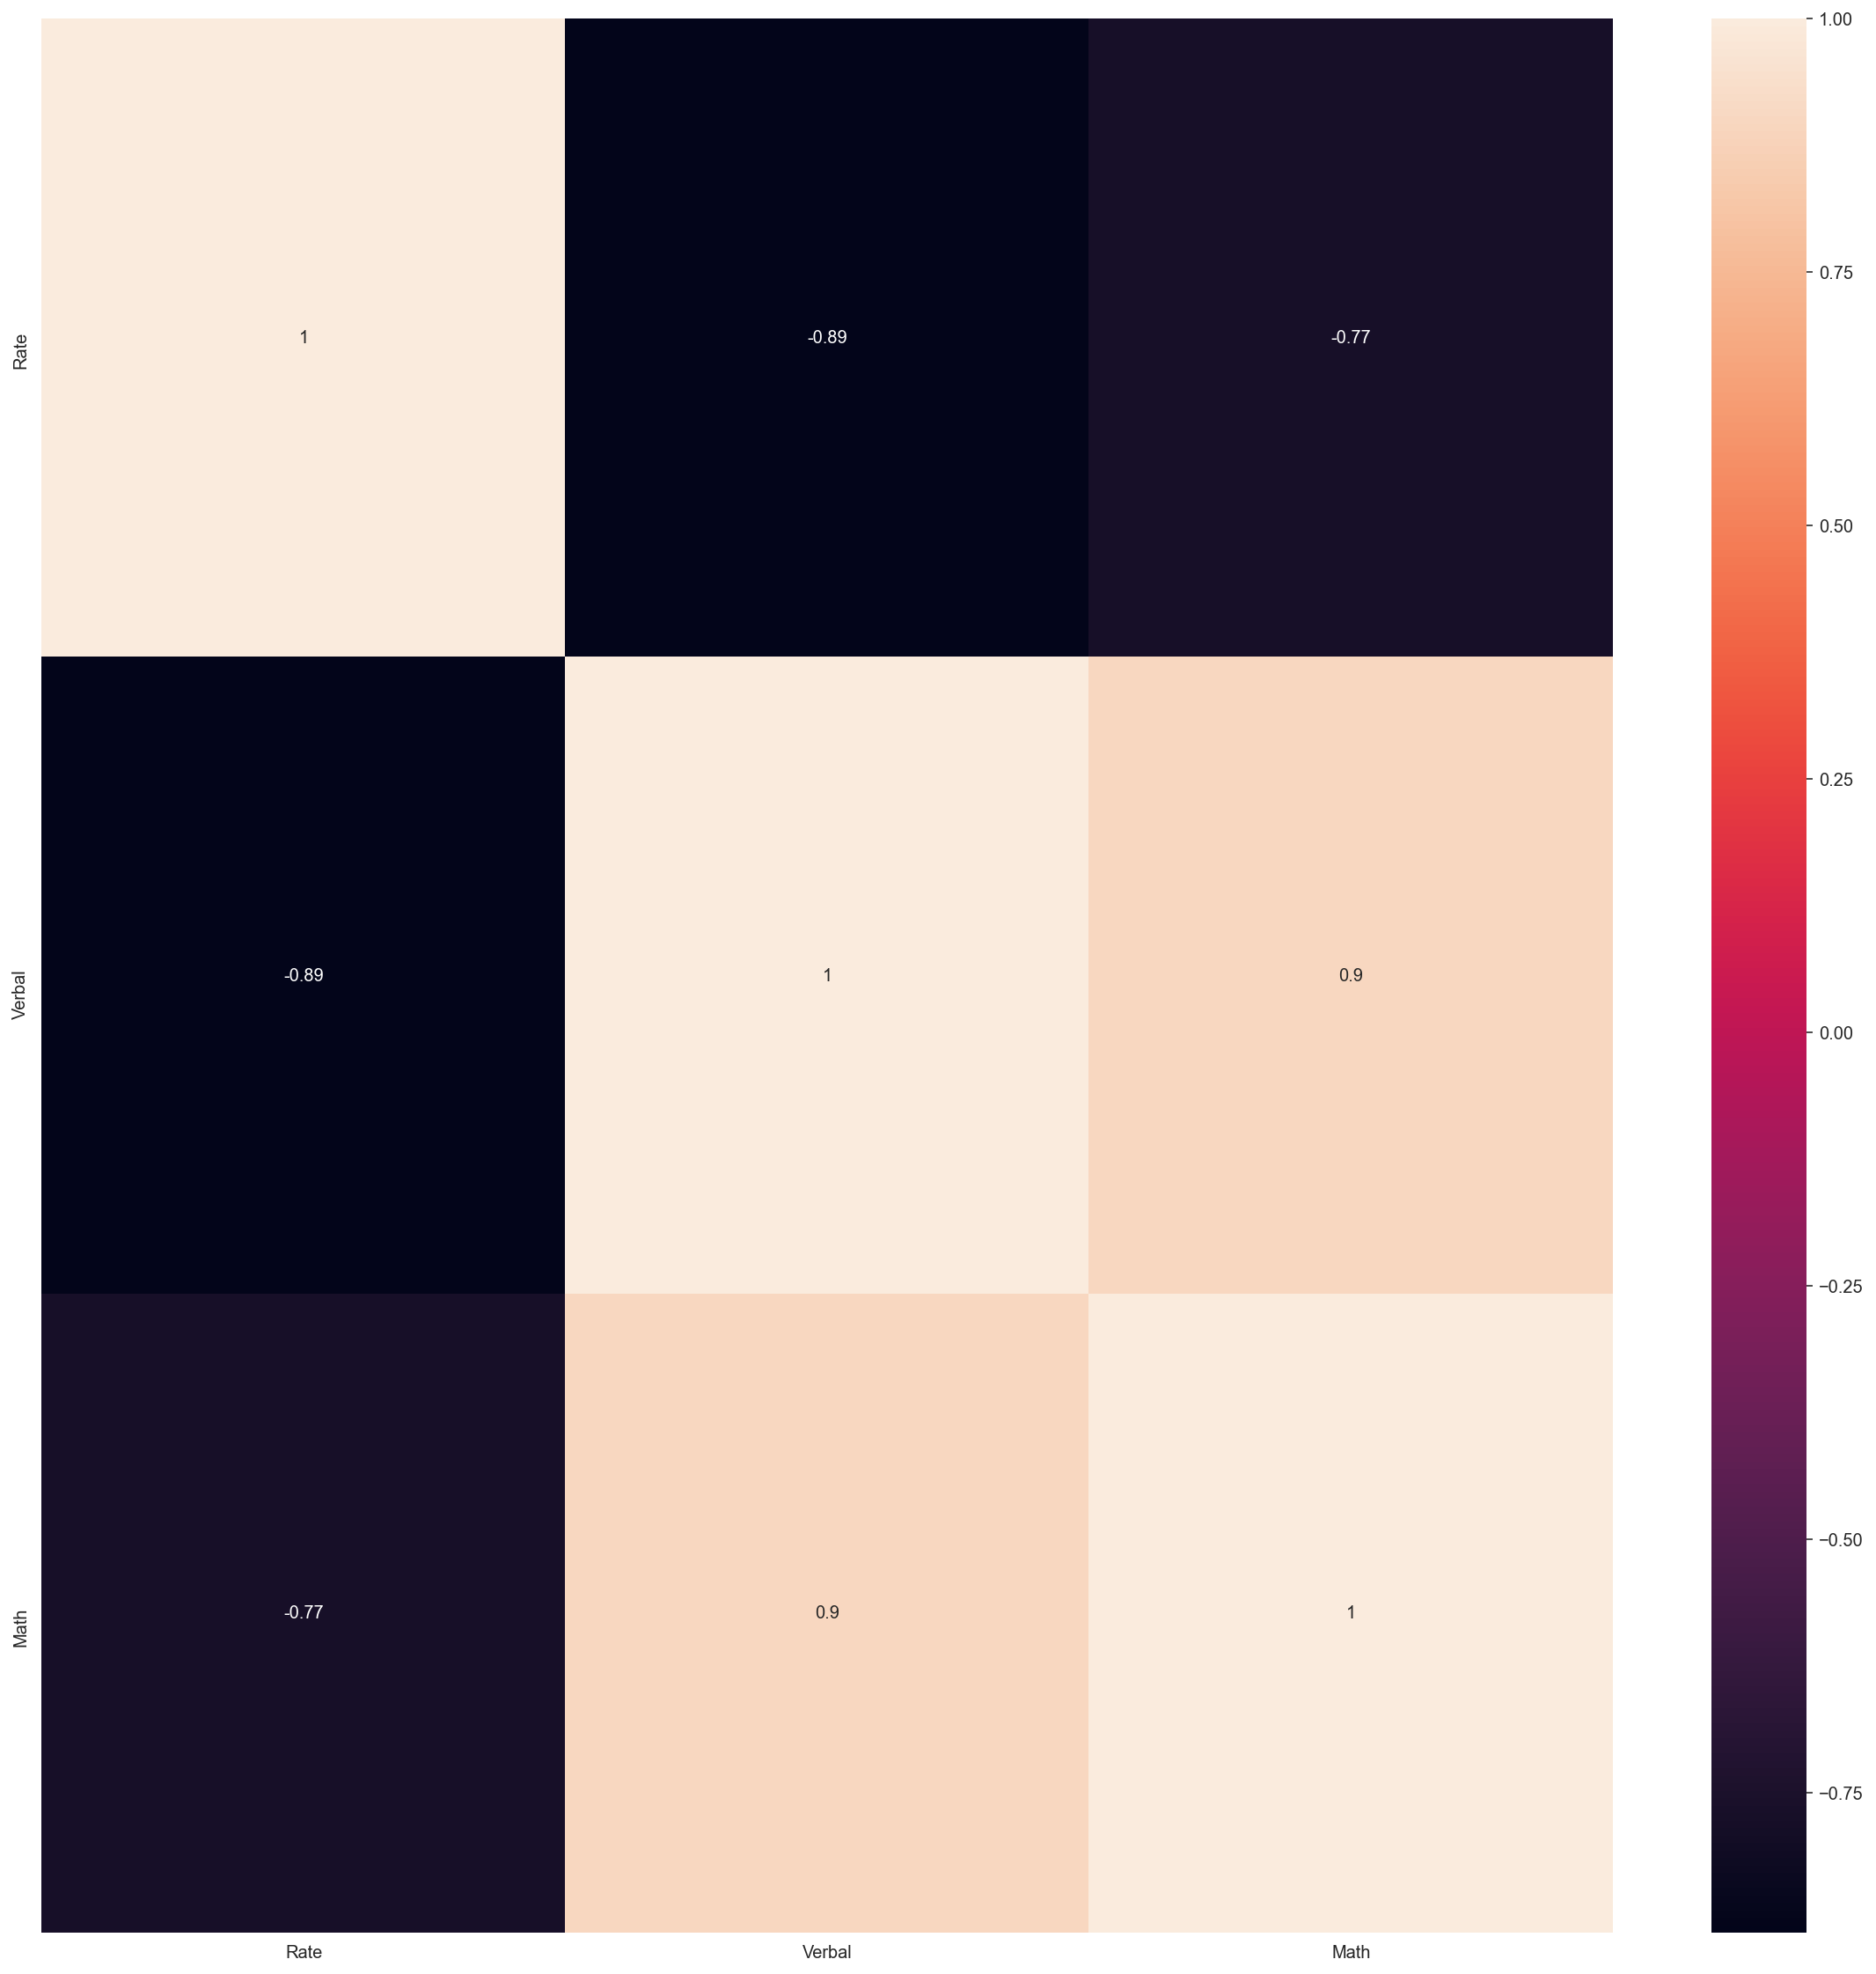

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(), annot=True)

In [79]:
#this correlation matrox shows us that there is a strong correlation between math and verbal, 
#with math & verbal having a strong positive correlation of .9 
#whilst math and rate having a negative correlation of .77 
#and verbal and rate gaving a negative correlation .89, 
#this interestingly demonstrates that people are more likely to complete their SAT's with math courses vs those with verbal courses

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [80]:
df1.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


In [81]:
#the rows mean 
#count- how many values
#mean - the average 
#std - the standard deviation 
#min - the min score 
#25% - how many of the count are in the bottom quartile 
#50% - **
#75% - **
#max - the max score

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [82]:
#1- diff between covariance and correlation matrix is that the covariance matrix is much harder to interpret, whils the correlation matrix helps demonstrate in simple terms the relatedness between the variables 

#2- the process is to follow the formula 𝑐𝑜𝑣(𝑋,𝑌)/(𝑠𝑡𝑑(𝑋)𝑠𝑡𝑑(𝑌))

#3- the correlation matrix is preferred as it is simply - more readable

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [83]:
drugs = pd.read_csv("/Users/alexjacob/Desktop/drug-use-by-age.csv")

In [84]:
drugs.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [85]:
drugs.tail(8)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [86]:
#drugs tail (8) contains a nice summary of our required stats 

In [87]:
drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [88]:
drugs.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [89]:
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [90]:
#column types check out - objects are frequency's, and most importantly there are no strings 

In [91]:
drugs.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [92]:
#column names looking clean

In [93]:
#data looks pretty clean !

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [94]:
#firstly - lets see how drug use vs frequency changes with age 

In [95]:
#lets group all the mean values for drug use & frequency 

In [96]:
drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [97]:
drugsmask1 = drugs.tail(8)

In [98]:
drugsmask1

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [99]:
#group the use columns to find use mean 
drugsmask2 = drugsmask1[drugsmask1.columns[::2]]
drugsmask2

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
9,21,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3
10,22-23,84.2,28.4,4.5,0.5,1.1,5.2,1.0,10.0,1.7,4.4,3.6,0.6,0.2
11,24-25,83.1,24.9,4.0,0.5,0.7,4.5,0.8,9.0,1.3,4.3,2.6,0.7,0.2
12,26-29,80.7,20.8,3.2,0.4,0.6,3.2,0.6,8.3,1.2,4.2,2.3,0.6,0.4
13,30-34,77.5,16.4,2.1,0.5,0.4,1.8,0.4,5.9,0.9,3.6,1.4,0.4,0.4
14,35-49,75.0,10.4,1.5,0.5,0.1,0.6,0.3,4.2,0.3,1.9,0.6,0.2,0.3
15,50-64,67.2,7.3,0.9,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2
16,65+,49.3,1.2,0.0,0.0,0.0,0.1,0.0,0.6,0.0,0.2,0.0,0.0,0.0


In [100]:
drugsage = drugsmask2.iloc[:,1:28]
drugsage
#this is the mean drug use/age, removing the age column 


,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
9,83.2,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3
10,84.2,28.4,4.5,0.5,1.1,5.2,1.0,10.0,1.7,4.4,3.6,0.6,0.2
11,83.1,24.9,4.0,0.5,0.7,4.5,0.8,9.0,1.3,4.3,2.6,0.7,0.2
12,80.7,20.8,3.2,0.4,0.6,3.2,0.6,8.3,1.2,4.2,2.3,0.6,0.4
13,77.5,16.4,2.1,0.5,0.4,1.8,0.4,5.9,0.9,3.6,1.4,0.4,0.4
14,75.0,10.4,1.5,0.5,0.1,0.6,0.3,4.2,0.3,1.9,0.6,0.2,0.3
15,67.2,7.3,0.9,0.4,0.1,0.3,0.2,2.5,0.4,1.4,0.3,0.2,0.2
16,49.3,1.2,0.0,0.0,0.0,0.1,0.0,0.6,0.0,0.2,0.0,0.0,0.0


In [101]:
drugsage2 = drugsage.T.mean()

<AxesSubplot:>

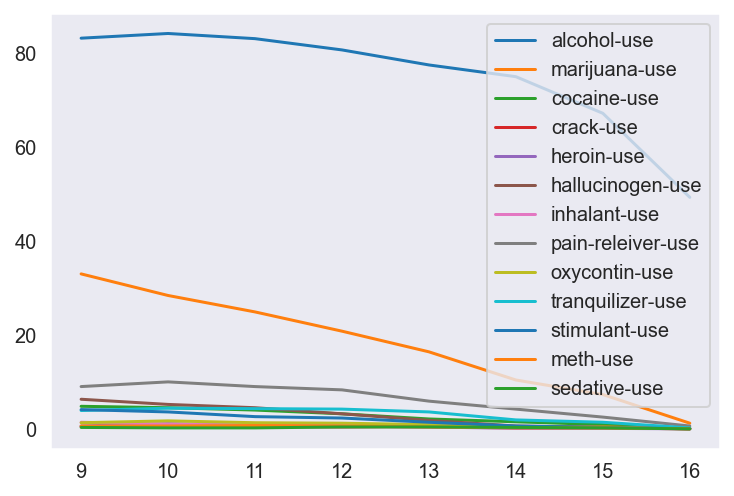

In [102]:
drugsage.plot()
#change x-axis names 

/Users/alexjacob/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

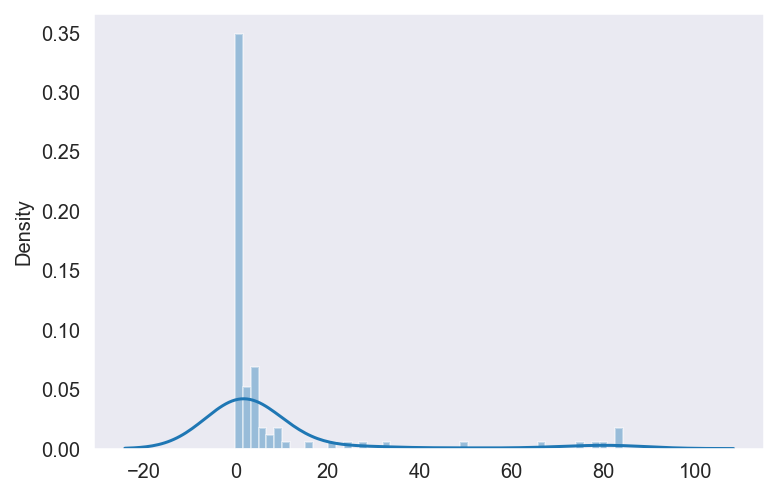

In [103]:
sns.distplot(drugsage)
#sns.distplot(df["Rate"], bins = 20, color ="green", kde= False)
#sns.distplot(df["Verbal"], bins = 20, kde = False)
#sns.distplot(df["Math"], bins = 20, color = 'darkred', kde = False)

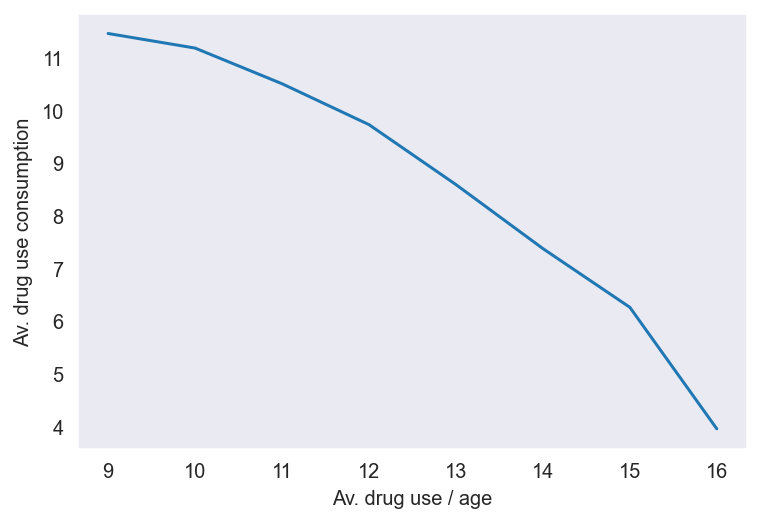

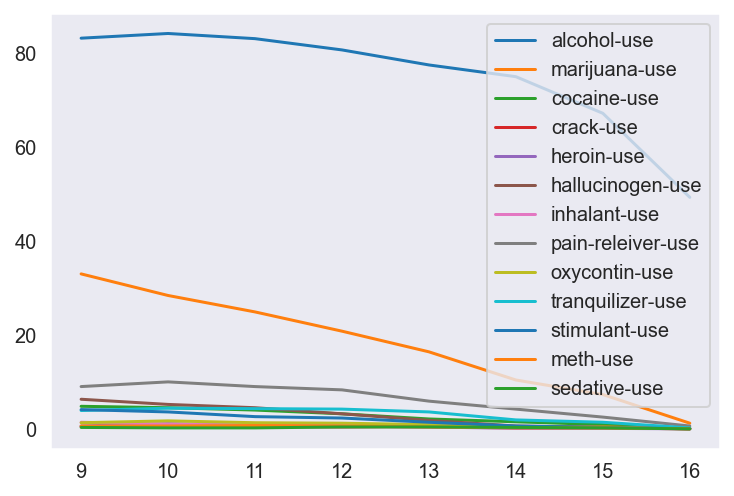

In [104]:
drugsage.T.mean().plot()
plt.xlabel("Av. drug use / age")
plt.ylabel("Av. drug use consumption")
style = "r"
drugsmask2[drugsmask2.columns[1:28]].plot()
axis = True


In [105]:
#the summary finding demonstrate the drug use decreases w/ age

In [106]:
#now we repeat with drug frequency
drugsfreq = drugsmask1.drop(['age'], axis = 1)

In [107]:
drugsfreq1 = drugsfreq[drugsfreq.columns[::2]]

In [108]:
drugsfreq1

,n,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
9,2354,52.0,52.0,5.0,17.0,30.0,4.0,2.0,15.0,13.5,7.0,10.0,2.0,9.0
10,4707,52.0,52.0,5.0,5.0,57.5,3.0,4.0,15.0,17.5,12.0,10.0,46.0,52.0
11,4591,52.0,60.0,6.0,6.0,88.0,2.0,2.0,15.0,20.0,10.0,10.0,21.0,17.5
12,2628,52.0,52.0,5.0,6.0,50.0,3.0,4.0,13.0,13.5,10.0,7.0,30.0,4.0
13,2864,52.0,72.0,8.0,15.0,66.0,2.0,3.5,22.0,46.0,8.0,12.0,54.0,10.0
14,7391,52.0,48.0,15.0,48.0,280.0,3.0,10.0,12.0,12.0,6.0,24.0,104.0,10.0
15,3923,52.0,52.0,36.0,62.0,41.0,44.0,13.5,12.0,5.0,10.0,24.0,30.0,104.0
16,2448,52.0,36.0,-,-,120.0,2.0,-,24.0,-,5.0,364.0,-,15.0


In [109]:
drugsfreq2 = drugsfreq1.drop(['n'], axis = 1)

In [110]:
drugsfreq2

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
9,52.0,52.0,5.0,17.0,30.0,4.0,2.0,15.0,13.5,7.0,10.0,2.0,9.0
10,52.0,52.0,5.0,5.0,57.5,3.0,4.0,15.0,17.5,12.0,10.0,46.0,52.0
11,52.0,60.0,6.0,6.0,88.0,2.0,2.0,15.0,20.0,10.0,10.0,21.0,17.5
12,52.0,52.0,5.0,6.0,50.0,3.0,4.0,13.0,13.5,10.0,7.0,30.0,4.0
13,52.0,72.0,8.0,15.0,66.0,2.0,3.5,22.0,46.0,8.0,12.0,54.0,10.0
14,52.0,48.0,15.0,48.0,280.0,3.0,10.0,12.0,12.0,6.0,24.0,104.0,10.0
15,52.0,52.0,36.0,62.0,41.0,44.0,13.5,12.0,5.0,10.0,24.0,30.0,104.0
16,52.0,36.0,-,-,120.0,2.0,-,24.0,-,5.0,364.0,-,15.0


<AxesSubplot:>

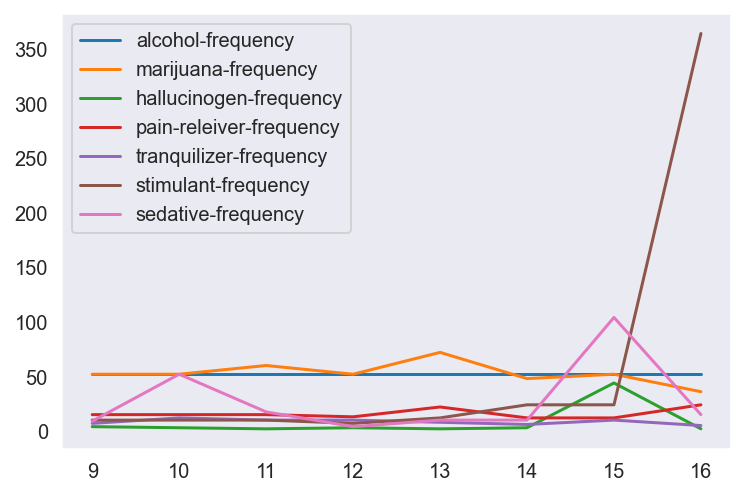

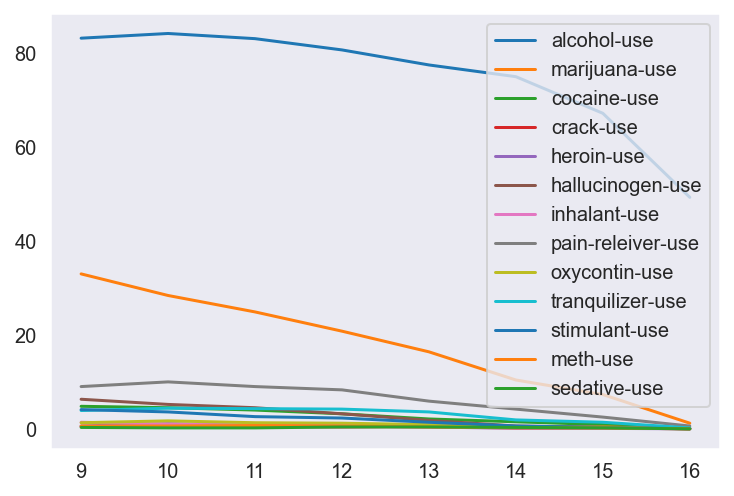

In [111]:

drugsfreq2.plot()
drugsage.plot()

In [112]:
#now we have drug use by age and frequcny

In [113]:
drugsfreq2

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
9,52.0,52.0,5.0,17.0,30.0,4.0,2.0,15.0,13.5,7.0,10.0,2.0,9.0
10,52.0,52.0,5.0,5.0,57.5,3.0,4.0,15.0,17.5,12.0,10.0,46.0,52.0
11,52.0,60.0,6.0,6.0,88.0,2.0,2.0,15.0,20.0,10.0,10.0,21.0,17.5
12,52.0,52.0,5.0,6.0,50.0,3.0,4.0,13.0,13.5,10.0,7.0,30.0,4.0
13,52.0,72.0,8.0,15.0,66.0,2.0,3.5,22.0,46.0,8.0,12.0,54.0,10.0
14,52.0,48.0,15.0,48.0,280.0,3.0,10.0,12.0,12.0,6.0,24.0,104.0,10.0
15,52.0,52.0,36.0,62.0,41.0,44.0,13.5,12.0,5.0,10.0,24.0,30.0,104.0
16,52.0,36.0,-,-,120.0,2.0,-,24.0,-,5.0,364.0,-,15.0


AttributeError: 'AxesSubplot' object has no attribute 'setxticks'

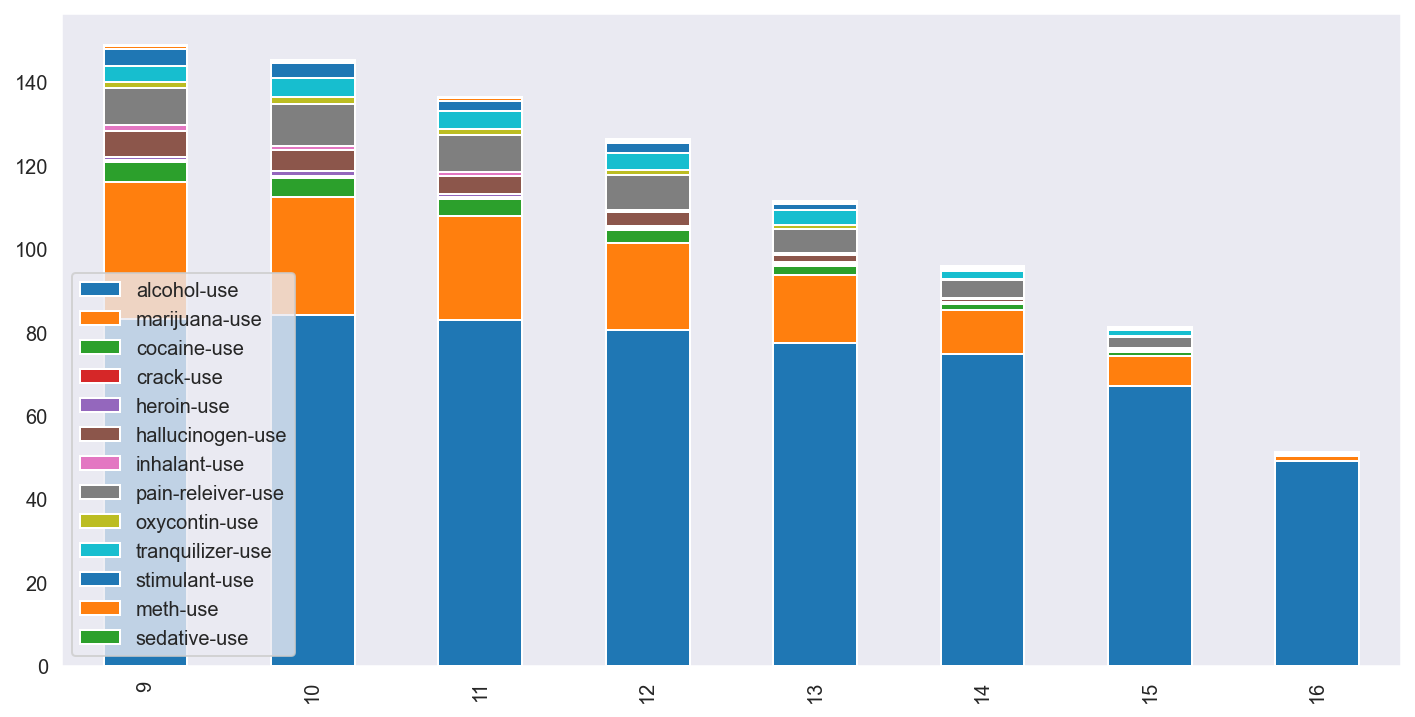

In [288]:
#Best way to do a complete overview of the data is to; 
#drugsage drugsfreq2
fig = plt.figure(figsize = (12,6))
ax =fig.gca()

drugsage.plot.bar(stacked=True, ax=ax)



<AxesSubplot:>

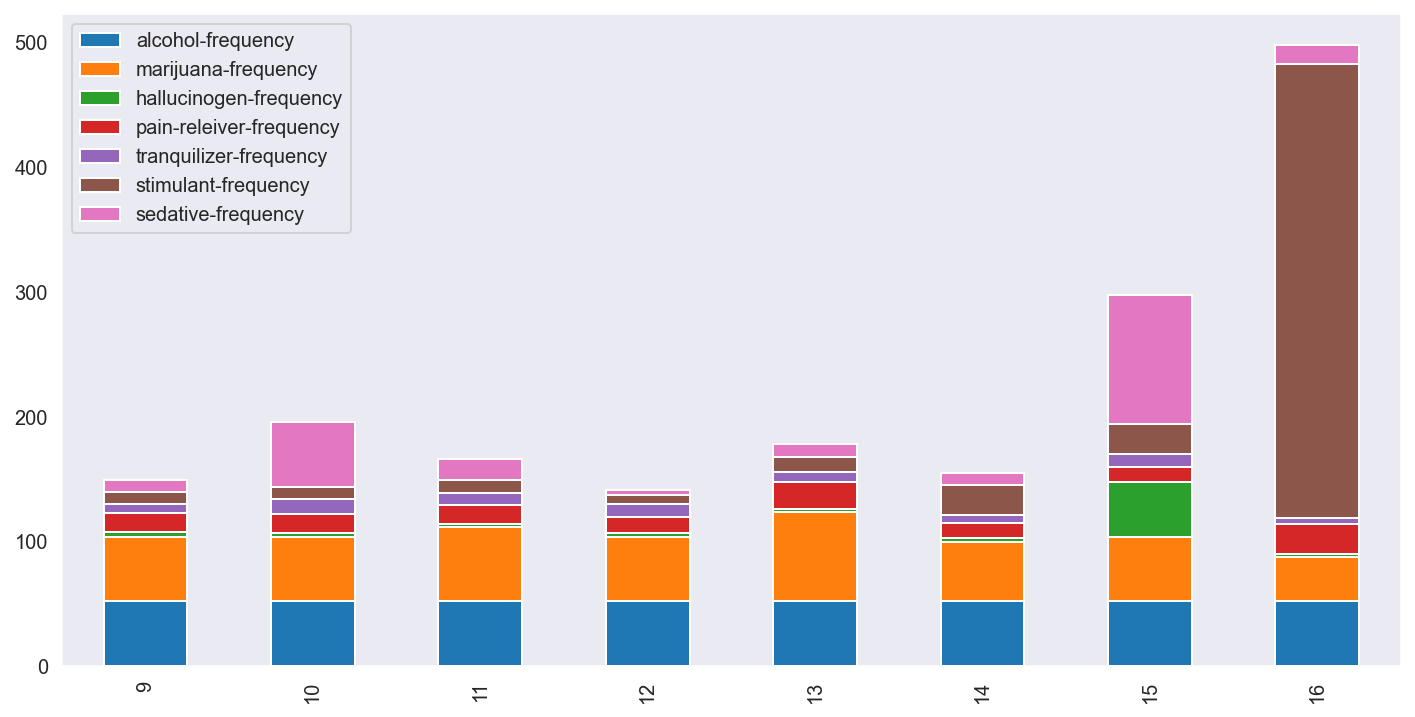

In [289]:
fig = plt.figure(figsize = (12,6))
ax = fig.gca()

drugsfreq2.plot.bar(stacked = True, ax=ax)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [116]:
# my alternate hypothesis is; 
#that older people(35-65) use more'hard' drugs(crack, heroin, oxcotin & meth) then younger people(22-34)

In [117]:
#hence, my null hypothesis is that older people do not use more hard drugs then their younger counterparts

In [118]:
#my first step is to group into 2 dataframes - one for people between the age 22-34 for the 'hard' drugs, and another for older people 

In [119]:
youngppl = drugs.iloc[9:14]

In [120]:
youngppl

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0


In [121]:
youngpplhard = youngppl[["crack-use", "crack-frequency",'heroin-use','heroin-frequency','oxycontin-use','oxycontin-frequency','meth-use','meth-frequency']]

In [122]:
youngpplhard

,crack-use,crack-frequency,heroin-use,heroin-frequency,oxycontin-use,oxycontin-frequency,meth-use,meth-frequency
9,0.5,17.0,0.6,30.0,1.3,13.5,0.6,2.0
10,0.5,5.0,1.1,57.5,1.7,17.5,0.6,46.0
11,0.5,6.0,0.7,88.0,1.3,20.0,0.7,21.0
12,0.4,6.0,0.6,50.0,1.2,13.5,0.6,30.0
13,0.5,15.0,0.4,66.0,0.9,46.0,0.4,54.0


In [123]:
youngpplharduse = youngpplhard[youngpplhard.columns[::2]]

In [124]:
youngpplhard[youngpplhard.columns[::2]]

,crack-use,heroin-use,oxycontin-use,meth-use
9,0.5,0.6,1.3,0.6
10,0.5,1.1,1.7,0.6
11,0.5,0.7,1.3,0.7
12,0.4,0.6,1.2,0.6
13,0.5,0.4,0.9,0.4


In [125]:
#now same for frequency 

In [126]:
youngpplhardfreq1=youngpplhard.drop(["crack-use"], axis = 1)

In [127]:
youngpplhardfreq1

,crack-frequency,heroin-use,heroin-frequency,oxycontin-use,oxycontin-frequency,meth-use,meth-frequency
9,17.0,0.6,30.0,1.3,13.5,0.6,2.0
10,5.0,1.1,57.5,1.7,17.5,0.6,46.0
11,6.0,0.7,88.0,1.3,20.0,0.7,21.0
12,6.0,0.6,50.0,1.2,13.5,0.6,30.0
13,15.0,0.4,66.0,0.9,46.0,0.4,54.0


In [128]:
youngpplhardfreq=youngpplhardfreq1[youngpplhardfreq1.columns[::2]]

In [129]:
youngpplhardfreq.dtypes

crack-frequency        object
heroin-frequency       object
oxycontin-frequency    object
meth-frequency         object
dtype: object

In [130]:
youngpplhardfreq3=youngpplhardfreq.astype(float)

<AxesSubplot:>

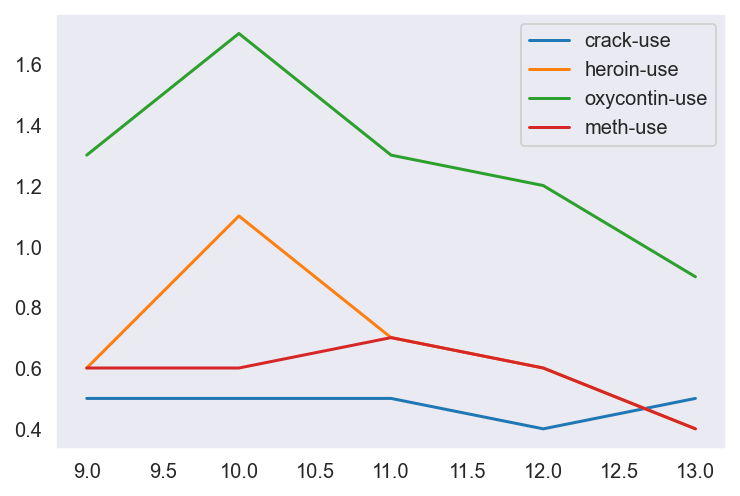

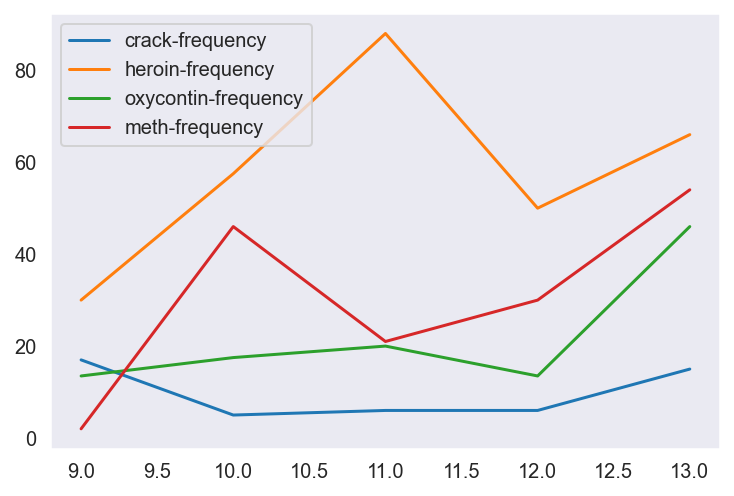

In [131]:
youngpplharduse.plot()
youngpplhardfreq3.plot()

In [132]:
#now repeat with old peeps
oldppl = drugs.iloc[14:18]

In [133]:
oldpplhard = oldppl[["crack-use", "crack-frequency",'heroin-use','heroin-frequency','oxycontin-use','oxycontin-frequency','meth-use','meth-frequency']]

In [134]:
oldpplhard

,crack-use,crack-frequency,heroin-use,heroin-frequency,oxycontin-use,oxycontin-frequency,meth-use,meth-frequency
14,0.5,48.0,0.1,280.0,0.3,12.0,0.2,104.0
15,0.4,62.0,0.1,41.0,0.4,5.0,0.2,30.0
16,0.0,-,0.0,120.0,0.0,-,0.0,-


In [135]:
oldpplharduse = oldpplhard[oldpplhard.columns[::2]]

In [136]:
oldpplharduse

,crack-use,heroin-use,oxycontin-use,meth-use
14,0.5,0.1,0.3,0.2
15,0.4,0.1,0.4,0.2
16,0.0,0.0,0.0,0.0


In [137]:
#now same for frequency

In [138]:
oldpplhardfreq1=oldpplhard.drop(["crack-use"], axis = 1)

In [139]:
oldpplhardfreq=oldpplhardfreq1[oldpplhardfreq1.columns[::2]]

In [140]:
oldpplhardfreq.dtypes

crack-frequency        object
heroin-frequency       object
oxycontin-frequency    object
meth-frequency         object
dtype: object

In [141]:
oldpplhardfreq

,crack-frequency,heroin-frequency,oxycontin-frequency,meth-frequency
14,48.0,280.0,12.0,104.0
15,62.0,41.0,5.0,30.0
16,-,120.0,-,-


In [142]:
#need to get rid of - 

In [143]:
oldpplhardfreq1=oldpplhardfreq.fillna("0")

In [144]:
oldpplhardfreq1

,crack-frequency,heroin-frequency,oxycontin-frequency,meth-frequency
14,48.0,280.0,12.0,104.0
15,62.0,41.0,5.0,30.0
16,-,120.0,-,-


In [145]:
oldpplhardfreq2=oldpplhardfreq1.replace('-', np.nan)

In [146]:
oldpplhardfreq2

,crack-frequency,heroin-frequency,oxycontin-frequency,meth-frequency
14,48.0,280.0,12.0,104.0
15,62.0,41.0,5.0,30.0
16,NaN,120.0,NaN,NaN


In [147]:
oldpplhardfreq3=oldpplhardfreq2.astype(float)

In [148]:
oldpplhardfreq3.dtypes

crack-frequency        float64
heroin-frequency       float64
oxycontin-frequency    float64
meth-frequency         float64
dtype: object

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y)
ax.plot(x, y2)
plt.show()
plt

<AxesSubplot:>

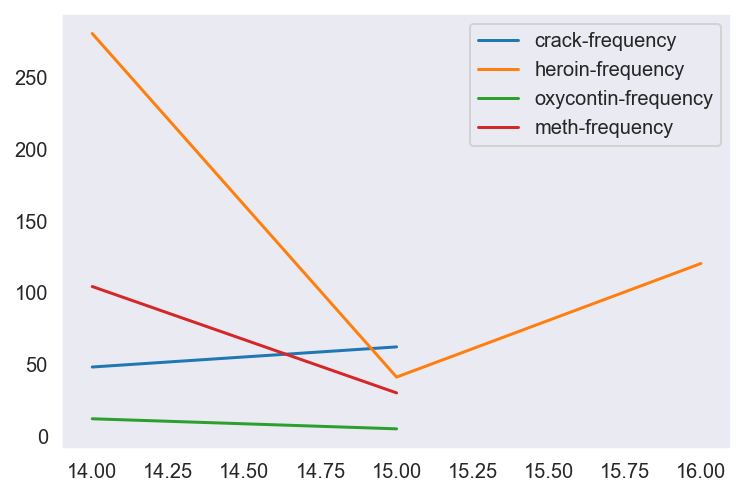

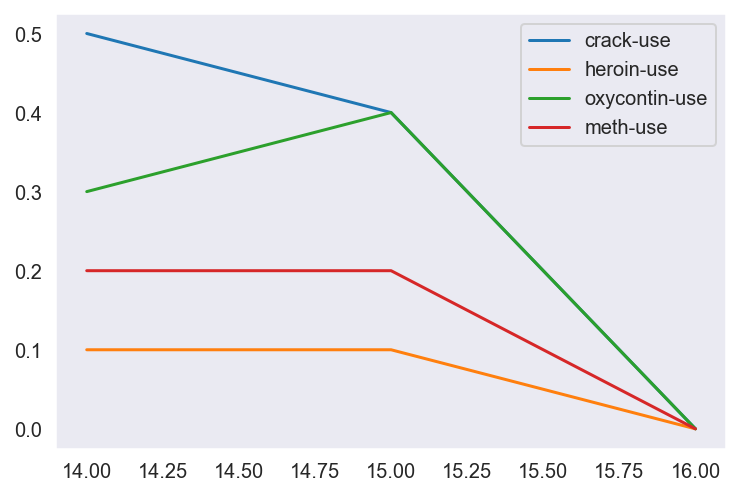

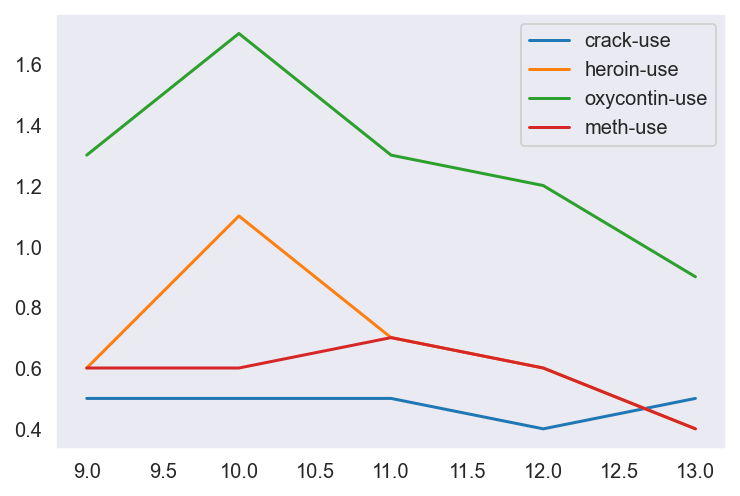

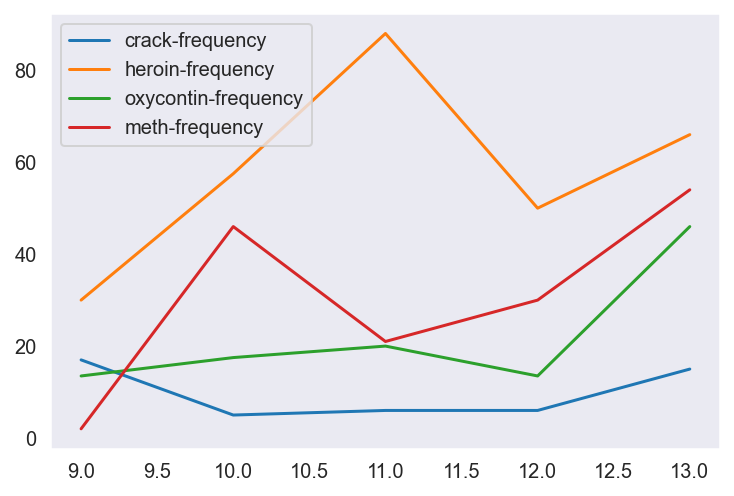

In [149]:
oldpplhardfreq3.plot()
oldpplharduse.plot()
youngpplharduse.plot()
youngpplhardfreq3.plot()


In [150]:
youngpplhardfreq3.dtypes

crack-frequency        float64
heroin-frequency       float64
oxycontin-frequency    float64
meth-frequency         float64
dtype: object

In [151]:
oldpplharduse.mean()

crack-use        0.300000
heroin-use       0.066667
oxycontin-use    0.233333
meth-use         0.133333
dtype: float64

In [152]:
youngolduse = pd.concat([youngpplharduse,oldpplharduse],ignore_index = True)

In [153]:
youngolduse

,crack-use,heroin-use,oxycontin-use,meth-use
0,0.5,0.6,1.3,0.6
1,0.5,1.1,1.7,0.6
2,0.5,0.7,1.3,0.7
3,0.4,0.6,1.2,0.6
4,0.5,0.4,0.9,0.4
5,0.5,0.1,0.3,0.2
6,0.4,0.1,0.4,0.2
7,0.0,0.0,0.0,0.0


In [154]:
youngpplharduse["crack-use"].mean

<bound method Series.mean of 9     0.5
10    0.5
11    0.5
12    0.4
13    0.5
Name: crack-use, dtype: float64>

In [155]:
young = youngpplharduse["crack-use"]

In [156]:
old = oldpplharduse["crack-use"]

In [157]:
from scipy.stats import ttest_ind
ttest_ind(young, old)

Ttest_indResult(statistic=1.56934312304156, pvalue=0.16761907118149116)

In [158]:
#due to there p value being over alpha of 0.025, we fail to reject the null hypothesis and can conclude it to be statisticly insignificant 

In [159]:
#now we try with crack frequency as opposed to use 

In [160]:
youngpplhardfreq3

,crack-frequency,heroin-frequency,oxycontin-frequency,meth-frequency
9,17.0,30.0,13.5,2.0
10,5.0,57.5,17.5,46.0
11,6.0,88.0,20.0,21.0
12,6.0,50.0,13.5,30.0
13,15.0,66.0,46.0,54.0


In [161]:
youngf = youngpplhardfreq3["crack-frequency"]

In [162]:
youngf

9     17.0
10     5.0
11     6.0
12     6.0
13    15.0
Name: crack-frequency, dtype: float64

In [163]:
#oldpplhardfreq8=oldpplhardfreq9.astype(float)

In [164]:
oldpplhardfreq9=oldpplhardfreq.iloc[0:2]

In [165]:
oldpplhardfreq8 = oldpplhardfreq9.astype(float)

In [166]:
oldpplhardfreq8

,crack-frequency,heroin-frequency,oxycontin-frequency,meth-frequency
14,48.0,280.0,12.0,104.0
15,62.0,41.0,5.0,30.0


In [167]:
oldf = oldpplhardfreq8["crack-frequency"]

In [168]:
oldf

14    48.0
15    62.0
Name: crack-frequency, dtype: float64

In [169]:
ttest_ind(youngf,oldf,)

Ttest_indResult(statistic=-7.9863144679644815, pvalue=0.0004968791088638168)

In [170]:
#as they p valus is over the alpha of .025, we can conclude that crack frequency increases/age, however crack usage is failed re. the null hypothesis

In [171]:
#the alpha is 0.05 - it is a 2 tailed test 

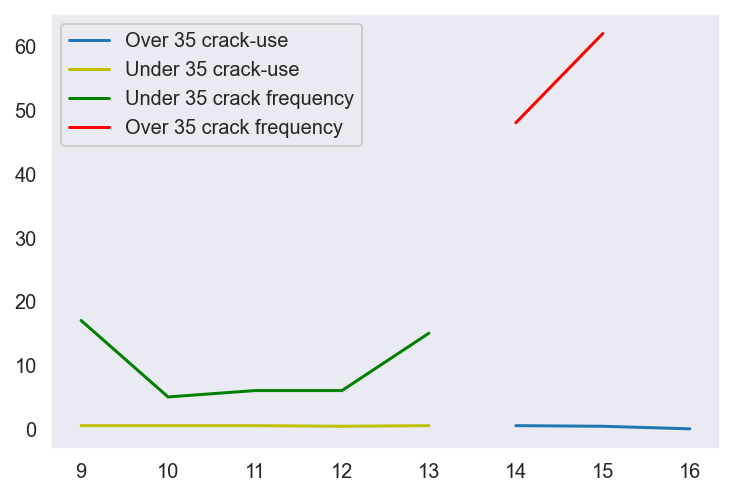

In [249]:
ax1 = plt.plot(old, label = "Over 35 crack-use")
plt.plot(young, color = "y", label = "Under 35 crack-use")
plt.plot(youngf, color = "g", label = "Under 35 crack frequency")
plt.plot(oldf, color = "r", label = "Over 35 crack frequency")
plt.legend(framealpha=1, frameon=True);
figsize = 100,100
range = 30,30


**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [ ]:
#Outliers – Any point that falls below the mean – 3 x the SD 
#		OR
#	    Any point that falls above the mean + 3x SD 


In [178]:
satscores["Rate"]

0     82
1     81
2     79
3     77
4     72
5     71
6     71
7     69
8     69
9     68
10    67
11    65
12    65
13    63
14    60
15    57
16    56
17    55
18    54
19    53
20    53
21    52
22    51
23    51
24    34
25    33
26    31
27    26
28    23
29    18
30    17
31    13
32    13
33    12
34    12
35    11
36    11
37     9
38     9
39     9
40     8
41     8
42     8
43     7
44     6
45     6
46     5
47     5
48     4
49     4
50     4
Name: Rate, dtype: int64

In [179]:
satscores["Rate"].std()

27.550680572356104

In [180]:
satscores["Rate"].mean()

37.0

In [181]:
#As outliers are calculated as either 
    #-any point that falls below the mean - 3 x the SD 
    #OR as any point that falls above the mean + 3x the SD 

In [182]:
27.5 + 3 * 37

138.5

In [183]:
27.5 - 3 * 27 

-53.5

In [184]:
#therefore, any point above 27.5 + 3*37(111)  =  138.5
#and any point below 27.5 - 3*27 - 3*37 - 27  = -53.5 
#are considered outliers

In [185]:
print(satscores["Rate"])

0     82
1     81
2     79
3     77
4     72
5     71
6     71
7     69
8     69
9     68
10    67
11    65
12    65
13    63
14    60
15    57
16    56
17    55
18    54
19    53
20    53
21    52
22    51
23    51
24    34
25    33
26    31
27    26
28    23
29    18
30    17
31    13
32    13
33    12
34    12
35    11
36    11
37     9
38     9
39     9
40     8
41     8
42     8
43     7
44     6
45     6
46     5
47     5
48     4
49     4
50     4
Name: Rate, dtype: int64


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [ ]:
#extra stuff - put at bottom to keep the above code clean but can